#Time Series Forecasting

Untuk melakukan prediksi pada data yang terikat dengan waktu (Time series) struktur Neural Network yang umum digunakan adalah struktur Recurrent Neural Network (RNN). Struktur pada perceptron RNN adalah sebagai berikut.
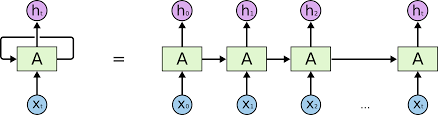

RNN akan menggunakan data sebelumnya sebagai salah satu parameter input.

pada latihan ini akan digunakan salah satu perkembangan struktur RNN yaitu Long-Short Term Memory (LSTM) dengan struktur sebagai berikut:

![alt text](https://colah.github.io/images/post-covers/lstm.png)





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

Pada latihan ini digunakan data sejarah temperatur terendah pada permukaan bumi.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df


Visualisasi Data

In [0]:
sns.lineplot(data=df, x='Date',y = 'Temp')

## Data Preparation

Data pada data time series dipisahkan bedasarkan waktu. data test diambil pada waktu terakhir.

In [0]:
train = df.head(3000)
test = df.tail(650)

data pada LSTM harus diolah agar memiliki bentuk data input berurutan. 

bila data time series merupakan :
`[1,2,3,4,5,6]`

dan data input ingin dipelajari untuk setiap 3 step. maka data input dan target akan terlihat sebagai berikut:

|Input| Output|
|---|---|
|`1,2,3`|`4`|
|`2,3,4`|`5`|
|`3,4,5`|`6`|


fungsi `split_sequence` memecah data menjadi bentuk data LSTM`

In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
n_steps = 50

data input pada model LSTM menggunakan bentuk 3D dimana 

1. Dimensi pertama merupakan banyaknya data
2. Dimensi kedua merupakan banyaknya step pada time series
3. Dimensi ketiga merupakan banyaknya variabel yang digunakan sebagai input

pada data LSTM berikut digunakan 1 parameter maka data dapat di ubah menjadi bentuk berikut:

`x = x.reshape((x.shape[0], x.shape[1], 1))`

In [0]:
x,y = split_sequence(train['Temp'].values,n_steps)
x = x.reshape((x.shape[0], x.shape[1], 1))

In [0]:
x_test,y_test = split_sequence(test['Temp'].values,n_steps)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

## Making and Training the Model

Pada LSTM Node disusun secara berururtan untuk melakukan perulangan pada node. pada model dibawah mode 50 Node LSTM dihubungkan dengan 1 node dense sebagai output. bentuk input untuk model LSTM adalah `(n_steps, n_parameter)` dimana 
`n_steps` merupakan banyaknya data time series sedangaknan `n_parameter` merupakaan banyaknya parameter yang digunakan.

In [0]:
model = keras.Sequential([
  keras.layers.LSTM(50, activation=keras.activations.linear, input_shape=(n_steps,1)),
  keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [0]:
np.shape(x)

In [0]:
model.summary()

In [0]:
history = model.fit(x, y, epochs=50, verbose=1,validation_data = (x_test,y_test))

In [0]:
print('Loss History Plot') 
plt.plot(history.history['loss'][2:40])
plt.plot(history.history['val_loss'][2:40])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


## Evaluation

#### Predicting Training Data

In [0]:
y_pred = model.predict(x, verbose=1)

In [0]:
np.shape(train['Date'].values)

In [0]:
plt.plot(train['Date'].values[50:], y)
plt.plot(train['Date'].values[50:], y_pred)
plt.legend(['train', 'test'], loc='upper right')



#### Predicting Testing Data

In [0]:
y_pred = model.predict(x_test, verbose=1)

In [0]:
plt.plot(y_test)
# plt.plot(yhat)
plt.plot(y_pred)

#### Predicting Future Data

In [0]:
start_data = df['Temp'].tail(n_steps).values

start_data = start_data.reshape((1,n_steps, 1))
input_data = start_data.copy()
prediction = []
n_pred = 200

In [0]:
for i in range(0,n_pred):
  y_pred = model.predict(input_data, verbose=0)
  prediction = np.append(prediction,y_pred)
  input_data = np.append(input_data[:,1:,:],y_pred.reshape((1,1, 1)),axis=1)

In [0]:
plt.plot(prediction)